Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Question.ipynb

Solution Coursera Colab link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Exercises/Exercise%205%20-%20Real%20World%20Scenarios/Exercise%205%20-%20Answer.ipynb

In [0]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

TensorFlow 2.x selected.
2.1.0


In [0]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-03-18 00:08:26--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 72.247.100.147, 2600:1406:3f:384::e59, 2600:1406:3f:3a0::e59
Connecting to download.microsoft.com (download.microsoft.com)|72.247.100.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  69.7MB/s    in 12s     

2020-03-18 00:08:39 (64.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [0]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [0]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    print(os.getcwd())
    print( os.listdir('/content/') )
    os.chdir('/tmp/')  # to change directory
    print(os.getcwd())
    !ls
    os.chdir('/tmp/PetImages/')
    print(os.getcwd())
    !ls
    os.chdir('/tmp/')
    os.mkdir('cats-v-dogs')
    !ls
    os.chdir('/tmp/cats-v-dogs/')    
    # os.mkdir('training')    
    print(os.getcwd())    
    !ls

except OSError:
    print('error encountered trying to create directory.')
    pass



/content
['.config', 'sample_data']
/tmp
 cats-and-dogs.zip  'MSR-LA - 3467.docx'   PetImages  'readme[1].txt'
/tmp/PetImages
Cat  Dog
 cats-and-dogs.zip  'MSR-LA - 3467.docx'  'readme[1].txt'
 cats-v-dogs	     PetImages
/tmp/cats-v-dogs


In [0]:
try:
    #YOUR CODE GOES HERE
    os.chdir('/tmp/cats-v-dogs/')    
    os.mkdir('training')    
    os.mkdir('testing')   
    print(os.getcwd())    
    !ls

except OSError:
    print('error encountered trying to create directory.')
    pass

/tmp/cats-v-dogs
testing  training


In [0]:
try:
    #YOUR CODE GOES HERE
    os.chdir('/tmp/cats-v-dogs/training')    
    os.mkdir('cats')    
    os.mkdir('dogs')   
    print(os.getcwd())    
    !ls

except OSError:
    print('error encountered trying to create directory.')
    pass

/tmp/cats-v-dogs/training
cats  dogs


In [0]:
try:
    #YOUR CODE GOES HERE
    os.chdir('/tmp/cats-v-dogs/testing')    
    os.mkdir('cats')    
    os.mkdir('dogs')   
    print(os.getcwd())    
    !ls

except OSError:
    print('error encountered trying to create directory.')
    pass

/tmp/cats-v-dogs/testing
cats  dogs


In [0]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# So, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  # YOUR CODE STARTS HERE
  source_img_names = os.listdir(SOURCE)  # this is a list containing all the image file names.
  source_img_names = random.sample(source_img_names, len(source_img_names))
  train_size = int(split_size * len(source_img_names))
  # test_size = len(source_img_names) - train_size

  for i, name in enumerate(source_img_names):

    source_file_path = os.path.join(SOURCE, name)

    if os.path.getsize(source_file_path) > 0.0 :

      if i<train_size:      
        target_file_path = os.path.join(TRAINING, name)
      else :
        target_file_path = os.path.join(TESTING, name)        
    
      copyfile(source_file_path, target_file_path)

    else :
      print('%s has zero length: ignored' %source_file_path)

  # YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring



/tmp/PetImages/Cat/666.jpg has zero length: ignored
/tmp/PetImages/Dog/11702.jpg has zero length: ignored


In [0]:
# print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
# print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
# print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
# print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

base_dir = '/tmp/cats-v-dogs/'
print(len(os.listdir(os.path.join(base_dir,'training','cats'))))
print(len(os.listdir(os.path.join(base_dir,'training','dogs'))))
print(len(os.listdir(os.path.join(base_dir,'testing','cats'))))
print(len(os.listdir(os.path.join(base_dir,'testing','dogs'))))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11249
1250
1251


In [0]:
img_size = 150

# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
  # YOUR CODE HERE
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [0]:
TRAINING_DIR = os.path.join(base_dir,'training')  #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale=1/255)  #YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(
    #YOUR CODE HERE
    TRAINING_DIR,
    target_size=(img_size, img_size),
    batch_size = 128,
    class_mode='binary' 
)  

VALIDATION_DIR = os.path.join(base_dir,'testing')  #YOUR CODE HERE
validation_datagen = ImageDataGenerator(rescale=1/255)  #YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(
    #YOUR CODE HERE
    VALIDATION_DIR,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary'
)


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22497 images belonging to 2 classes.
Found 2501 images belonging to 2 classes.


In [0]:
# Callback to stop the training:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    target=0.95
    if (logs['accuracy']>target):
      print('Reached %0.1f%% training accuracty. Training converged!' %(target*100))
      self.model.stop_training=True

callback = myCallback()


history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.n//train_generator.batch_size,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps = validation_generator.n//validation_generator.batch_size,
                              verbose=1)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 175 steps, validate for 19 steps
Epoch 1/15
123/175 [====================>.........] - ETA: 24s - loss: 0.6752 - accuracy: 0.5870

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

175/175 [==============================] - 86s 490ms/step - loss: 0.6574 - accuracy: 0.6085 - val_loss: 0.7246 - val_accuracy: 0.5629
Epoch 2/15
175/175 [==============================] - 78s 443ms/step - loss: 0.5721 - accuracy: 0.6999 - val_loss: 0.7609 - val_accuracy: 0.5847
Epoch 3/15
175/175 [==============================] - 79s 453ms/step - loss: 0.5114 - accuracy: 0.7457 - val_loss: 0.4790 - val_accuracy: 0.7706
Epoch 4/15
175/175 [==============================] - 79s 452ms/step - loss: 0.4581 - accuracy: 0.7810 - val_loss: 0.4220 - val_accuracy: 0.7985
Epoch 5/15
175/175 [==============================] - 79s 452ms/step - loss: 0.3951 - accuracy: 0.8187 - val_loss: 0.6089 - val_accuracy: 0.6468
Epoch 6/15
175/175 [==============================] - 78s 445ms/step - loss: 0.3491 - accuracy: 0.8426 - val_loss: 0.3763 - val_accuracy: 0.8318
Epoch 7/15
175/175 [==============================] - 77s 442ms/step - loss: 0.2995 - accuracy: 0.8670 - val_loss: 0.3419 - val_accuracy: 0.8

Text(0.5, 1.0, 'Training and validation loss')

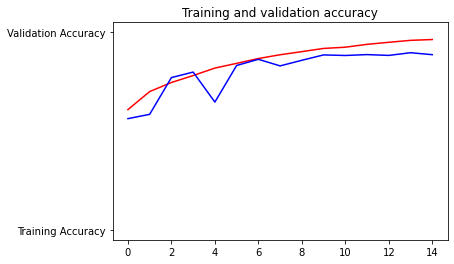

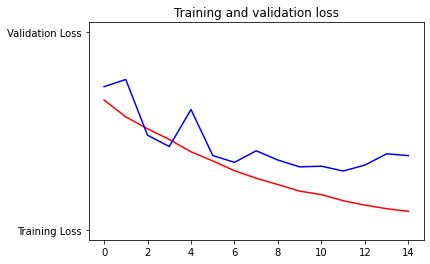

In [0]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image


os.chdir('/content/')
print(os.getcwd())
print(os.listdir())

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(img_size, img_size))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

/content
['.config', 'sample_data']


Using TensorFlow backend.


MessageError: ignored

In [0]:
# Clean-up:
import os, signal

os.kill( os.getpid(), signal.SIGKILL )